In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backport

Note: you may need to restart the kernel to use updated packages.


In [92]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
os.path.join('data', 'happy')

'data/happy'

In [7]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
len(gpus)

1

In [90]:
#Avoid OOM errors by setting GPU Memory Consumrtion Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [93]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

## 1.2 Remove dodgy images

In [9]:
# Import required libraries
import cv2
import imghdr
from matplotlib import pyplot as plt

In [94]:
# Define the path to the data directory
data_dir = '/home/mitraa/Jupyter Notebook/Emotion Detection CNN/datas'

In [95]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training')

val_datagen = ImageDataGenerator()

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation')

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation')

Found 104 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [96]:
# Print the list of files in the 'happy' subdirectory of the data directory
os.listdir(os.path.join(data_dir, 'happy'))

['jumping-and-dancing-happy-people-positive-emotions-set-illustration-free-vector.jpg',
 'smile.woman_.jpg',
 'AOLn63FpC7c2362vQI93kpEjbgobDYcM8VzaVLuBKTEWs64-c-mo.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'png-transparent-graphy-happy-people-love-child-photography-thumbnail.png',
 'happyball-3.jpg',
 'e60b714c-07cf-417a-912f-5758293ce23b_1140x641.jpg',
 'happypeople-1024x679.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'file-20230208-27-3jttof.jpg',
 'happy-person.jpeg',
 'image29.jpeg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'image22.jpeg',
 'friends-happy-190821.jpg',
 'images2.jpg',
 'GettyImages-454356720.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'what-makes-people-happy1.jpg',
 'image21.jpeg',
 '05-12-21-happy-people.jpg',
 'compassion-900x387.jpg',
 'happy-people-

In [97]:
# Define a list of valid image file extensions
image_exts = ['jpeg','jpg','bmp','png']

In [98]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

jumping-and-dancing-happy-people-positive-emotions-set-illustration-free-vector.jpg
smile.woman_.jpg
AOLn63FpC7c2362vQI93kpEjbgobDYcM8VzaVLuBKTEWs64-c-mo.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
png-transparent-graphy-happy-people-love-child-photography-thumbnail.png
happyball-3.jpg
e60b714c-07cf-417a-912f-5758293ce23b_1140x641.jpg
happypeople-1024x679.jpg
GettyImages-871518740-1024x707.jpg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
file-20230208-27-3jttof.jpg
happy-person.jpeg
image29.jpeg
gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg
ipsos-global-advisor-happiness-2022-opti.jpg
_happy_jumping_on_beach-40815.jpg
image22.jpeg
friends-happy-190821.jpg
images2.jpg
GettyImages-454356720.jpg
Dollarphotoclub_76084977-1.jpg
what-makes-people-happy1.jpg
image21.jpeg
05-12-21-happy-people.jpg
compassion-900x387.jpg
happy-people-using-mobile-smart-phone-men-women-94083621.jpg
image17.jpeg
friends_190412.jpg
happy-people-habits.jp

In [99]:
# Load an example image and display its shape and content
img = cv2.imread(os.path.join('datas','happy','05-12-21-happy-people.jpg'))
img.shape

(880, 1400, 3)

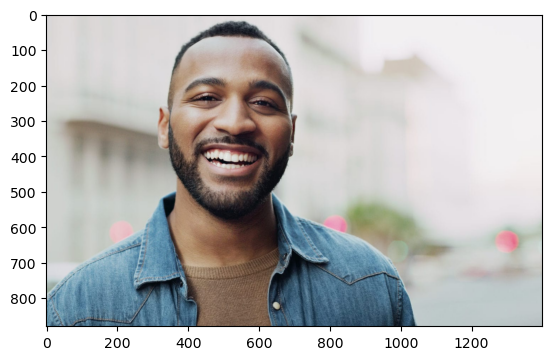

In [100]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [101]:
# Loop over each directory in the data directory
for image_class in os.listdir(data_dir):
    # Loop over each file in the current directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full path to the current image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Read the image data and determine its file type using the imghdr module
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # If the file type is not one of the valid image extensions, delete the file
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            # If an error occurs while processing the image, delete the file
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

## 1.3 Load Data

In [15]:
tf.data.Dataset??

In [102]:
# Import required libraries
import numpy as np

In [24]:
tf.keras.utils.image_dataset_from_directory??

In [103]:
# Load the image data into a TensorFlow dataset object
data = tf.keras.utils.image_dataset_from_directory('datas')

Found 104 files belonging to 2 classes.


In [104]:
# Get an iterator over the dataset
data_iterator = data.as_numpy_iterator()
data_iterator

2023-05-28 22:45:57.275666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [104]
	 [[{{node Placeholder/_0}}]]
2023-05-28 22:45:57.276193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [104]
	 [[{{node Placeholder/_0}}]]


In [105]:
# Get another batch from the itterator
# Get the first batch of images and their corresponding labels
batch = data_iterator.next()
batch

(array([[[[ 21.530273 ,  31.530273 ,  32.530273 ],
          [ 24.3125   ,  34.3125   ,  35.3125   ],
          [ 19.942383 ,  27.942383 ,  29.942383 ],
          ...,
          [ 28.96875  ,  33.96875  ,  36.96875  ],
          [ 29.78418  ,  34.78418  ,  37.78418  ],
          [ 27.280273 ,  32.280273 ,  35.280273 ]],
 
         [[ 19.       ,  29.       ,  30.       ],
          [ 20.97754  ,  30.97754  ,  31.97754  ],
          [ 17.954102 ,  25.954102 ,  27.954102 ],
          ...,
          [ 23.9375   ,  28.9375   ,  31.9375   ],
          [ 24.66504  ,  29.66504  ,  32.66504  ],
          [ 21.96582  ,  26.96582  ,  29.96582  ]],
 
         [[ 19.71875  ,  29.71875  ,  30.71875  ],
          [ 20.079102 ,  30.079102 ,  31.079102 ],
          [ 18.850586 ,  26.850586 ,  28.850586 ],
          ...,
          [ 22.       ,  27.       ,  30.       ],
          [ 23.       ,  28.       ,  31.       ],
          [ 20.90625  ,  25.90625  ,  28.90625  ]],
 
         ...,
 
         [[ 

In [106]:
# Images represented as numpy arrays:
# Print the shape of the images in the batch
batch[0].shape

(32, 256, 256, 3)

In [107]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
# Print the labels of the images in the batch
batch[1]

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

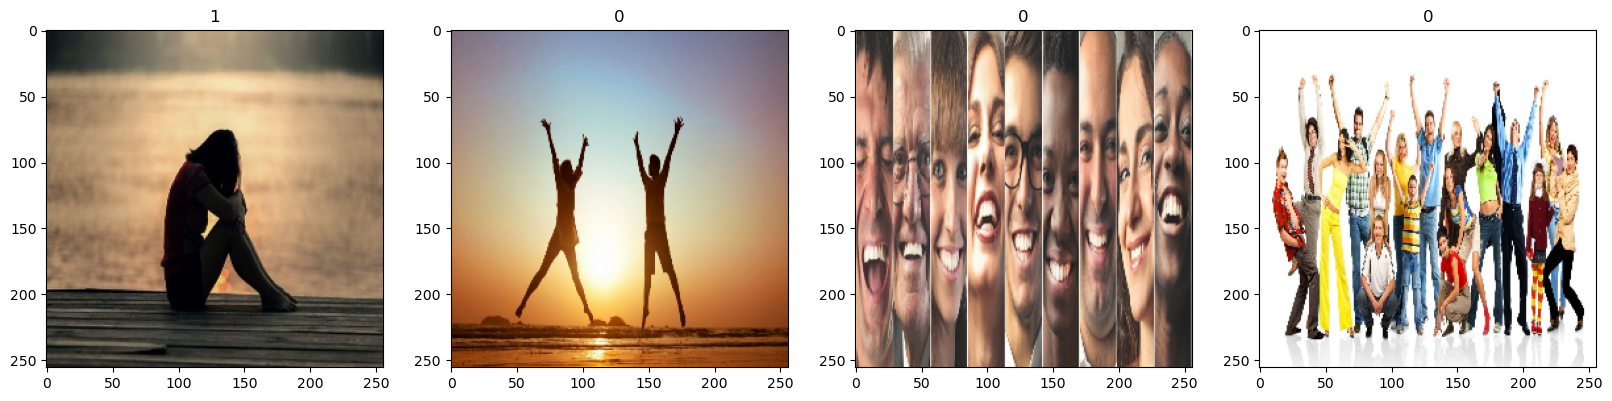

In [108]:
# Display the first four images in the batch along with their labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [109]:
# Scale the pixel values of the images to be between 0 and 1
scaled = batch[0] / 255
scaled.min()

0.0

In [110]:
# Print the minimum and maximum pixel values of the scaled images
scaled.max()

1.0

# 2. Preprocess Data


## 2.1 Scale Data

In [111]:
# Apply the scaling function to the entire dataset using the map() method
data = data.map(lambda x,y: (x/255,y))

In [112]:
# Get an iterator over the scaled dataset
scaled_iterator = data.as_numpy_iterator()

2023-05-28 22:46:13.105558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]
2023-05-28 22:46:13.105785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [104]
	 [[{{node Placeholder/_4}}]]


In [113]:
# Get the first batch of images and their corresponding labels from the scaled dataset
batch = scaled_iterator.next()

In [114]:
# Print the maximum pixel value of the images in the batch
batch[0].max()

1.0

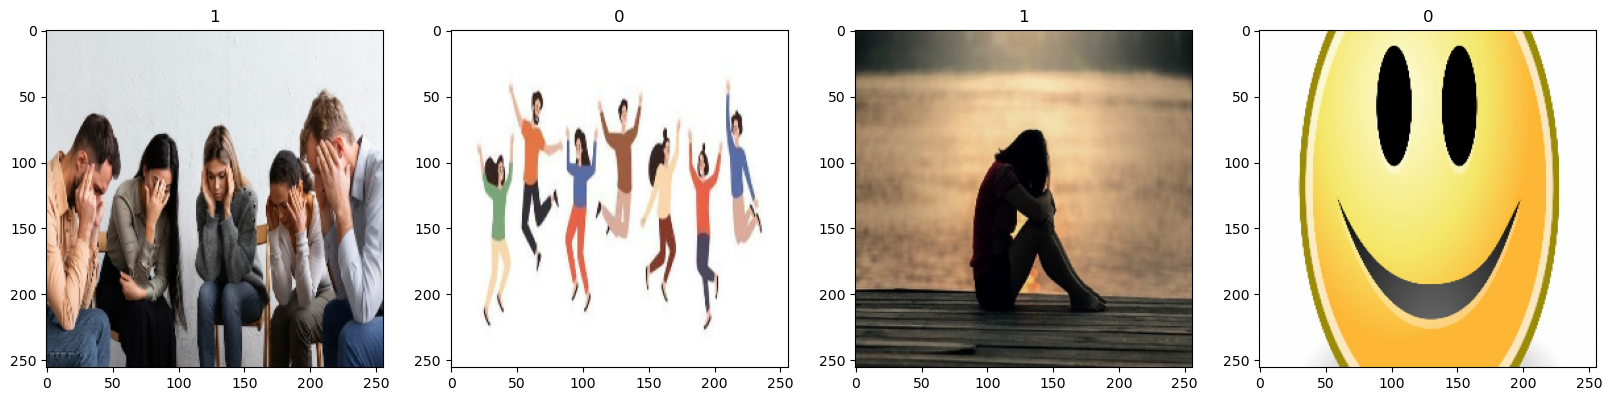

In [115]:
# Display the first four images in the batch from the scaled dataset
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [116]:
len(data)

4

In [117]:
# Calculate the sizes of the training, validation, and testing sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [118]:
train_size + test_size + val_size

4

In [119]:
# Split the dataset into training, validation, and testing sets using the take() and skip() methods
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [120]:
len(train)

2

# 3 Deep Model

## 3.1 Build Deep Learning Model

In [121]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [164]:
model = Sequential()

In [165]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [166]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

## 3.2 Train

In [168]:
logdir = 'logs'

In [169]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [170]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 2s 650ms/step - loss: 1.4607 - accuracy: 0.5938 - val_loss: 0.8955 - val_accuracy: 0.3750
Epoch 2/20
2/2 [==============================] - 1s 576ms/step - loss: 0.9800 - accuracy: 0.4688 - val_loss: 0.9837 - val_accuracy: 0.4688
Epoch 3/20
2/2 [==============================] - 1s 593ms/step - loss: 0.8858 - accuracy: 0.4844 - val_loss: 0.6694 - val_accuracy: 0.5312
Epoch 4/20
2/2 [==============================] - 1s 574ms/step - loss: 0.7390 - accuracy: 0.5781 - val_loss: 0.7647 - val_accuracy: 0.5312
Epoch 5/20
2/2 [==============================] - 1s 564ms/step - loss: 0.6474 - accuracy: 0.5781 - val_loss: 0.5788 - val_accuracy: 0.8125
Epoch 6/20
2/2 [==============================] - 1s 575ms/step - loss: 0.6012 - accuracy: 0.7656 - val_loss: 0.5982 - val_accuracy: 0.7188
Epoch 7/20
2/2 [==============================] - 1s 570ms/step - loss: 0.5687 - accuracy: 0.7656 - val_loss: 0.5608 - val_accuracy: 0.6562
Epoch 8/20
2/2 [====

In [171]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=50,
                    verbose=1)

Epoch 1/50


2023-05-28 23:00:17.582537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 3s 851ms/step - loss: 210.1647 - accuracy: 0.5577
Epoch 2/50
4/4 [==============================] - 3s 849ms/step - loss: 74.4325 - accuracy: 0.6346
Epoch 3/50
4/4 [==============================] - 3s 629ms/step - loss: 34.3365 - accuracy: 0.6346
Epoch 4/50
4/4 [==============================] - 3s 484ms/step - loss: 16.6466 - accuracy: 0.5962
Epoch 5/50
4/4 [==============================] - 3s 612ms/step - loss: 8.3530 - accuracy: 0.5577
Epoch 6/50
4/4 [==============================] - 3s 634ms/step - loss: 5.0703 - accuracy: 0.5962
Epoch 7/50
4/4 [==============================] - 3s 753ms/step - loss: 4.4408 - accuracy: 0.6250
Epoch 8/50
4/4 [==============================] - 3s 426ms/step - loss: 2.8842 - accuracy: 0.5769
Epoch 9/50
4/4 [==============================] - 3s 723ms/step - loss: 1.8479 - accuracy: 0.6635
Epoch 10/50
4/4 [==============================] - 3s 873ms/step - loss: 2.0308 - accuracy: 0.5673
Epoch 11/50
4/4 [========

In [172]:
hist.history

{'loss': [1.4607291221618652,
  0.9800283908843994,
  0.8858305215835571,
  0.7389777302742004,
  0.6474354267120361,
  0.6012195348739624,
  0.5687195062637329,
  0.5450755953788757,
  0.48638656735420227,
  0.5396769642829895,
  0.4644915461540222,
  0.4570086598396301,
  0.3921765685081482,
  0.3836233615875244,
  0.3216816782951355,
  0.2403155416250229,
  0.21387949585914612,
  0.13422679901123047,
  0.13085494935512543,
  0.12306512147188187],
 'accuracy': [0.59375,
  0.46875,
  0.484375,
  0.578125,
  0.578125,
  0.765625,
  0.765625,
  0.65625,
  0.703125,
  0.703125,
  0.78125,
  0.765625,
  0.8125,
  0.890625,
  0.875,
  0.953125,
  0.921875,
  0.953125,
  0.953125,
  0.953125],
 'val_loss': [0.8954660892486572,
  0.9837395548820496,
  0.6694439053535461,
  0.7647398710250854,
  0.5787696838378906,
  0.5982470512390137,
  0.5607802867889404,
  0.6242155432701111,
  0.4455413520336151,
  0.4819691479206085,
  0.4834095239639282,
  0.4018169045448303,
  0.29781103134155273,
  0

## 3.3 Plot Performance

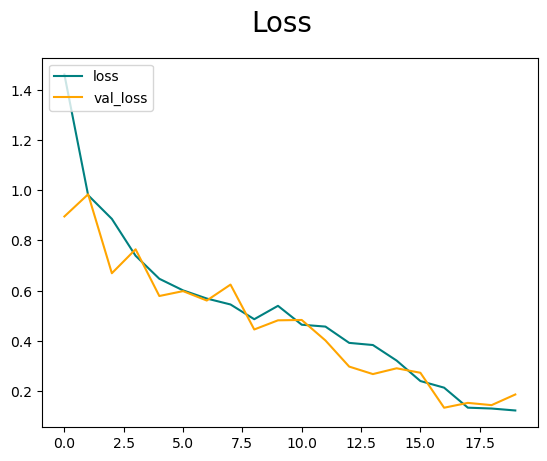

In [173]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

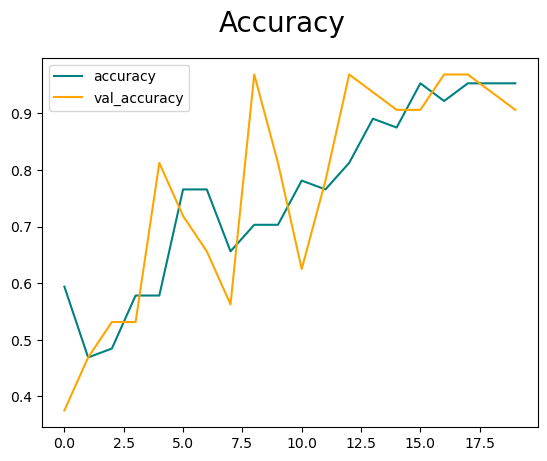

In [174]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

## 4.1 Evaluate 

In [175]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [176]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [177]:
len(test)

1

In [178]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 44ms/step


In [179]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.375, Recall:1.0, Accuracy:0.375


## 4.2 Test

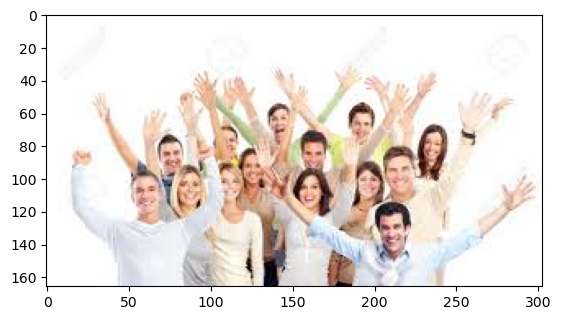

In [180]:
img = cv2.imread('happy test.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

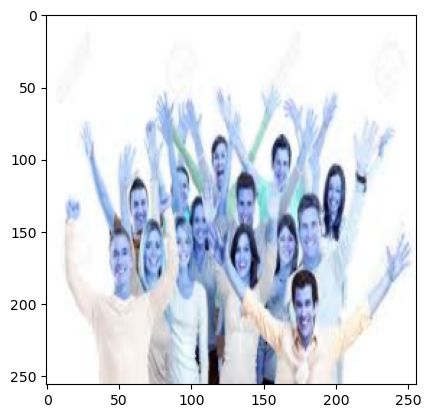

In [181]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [182]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [183]:
yhat

array([[0.6924623]], dtype=float32)

In [184]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 5. Save the Model

## 5.1 Save the Model